In [13]:
import cv2
import os


image = cv2.imread("LenaImage.jpeg")


In [14]:

quality_levels = [90, 70, 50]

for q in quality_levels:
    output_file = f"compressed_{q}.jpg"
    cv2.imwrite(output_file, image, [cv2.IMWRITE_JPEG_QUALITY, q])
    print(f"Saved {output_file} with quality {q}, Size: {os.path.getsize(output_file)} bytes")

Saved compressed_90.jpg with quality 90, Size: 55155 bytes
Saved compressed_70.jpg with quality 70, Size: 30212 bytes
Saved compressed_50.jpg with quality 50, Size: 22888 bytes


In [15]:

compression_levels = [0, 5, 9]

png_image = cv2.imread("Lena_Image.png")


In [16]:

for level in compression_levels:
    output_file = f"compressed_{level}.png"
    cv2.imwrite(output_file, png_image, [cv2.IMWRITE_PNG_COMPRESSION, level])
    print(f"Saved {output_file} with compression {level}, Size: {os.path.getsize(output_file)} bytes")


Saved compressed_0.png with compression 0, Size: 788279 bytes
Saved compressed_5.png with compression 5, Size: 512822 bytes
Saved compressed_9.png with compression 9, Size: 512809 bytes


In [17]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(X_train, y_train, 
                   epochs=50, 
                   batch_size=64,
                   validation_split=0.2)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print("\nModel Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC: {mean_auc:.4f}")

Epoch 1/50


/Users/n1kk_08/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8394 - loss: 0.5141 - val_accuracy: 0.9782 - val_loss: 0.0689
Epoch 2/50
570/750 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9794 - loss: 0.0656

KeyboardInterrupt: 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 108s 1us/step
Reduced training set size: 25000
Reduced test set size: 5000
Epoch 1/10


/Users/n1kk_08/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.2737 - loss: 1.9556 - val_accuracy: 0.4904 - val_loss: 1.4072
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5145 - loss: 1.3568 - val_accuracy: 0.5682 - val_loss: 1.2175
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5944 - loss: 1.1529 - val_accuracy: 0.6256 - val_loss: 1.0653
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6568 - loss: 0.9798 - val_accuracy: 0.6292 - val_loss: 1.0432
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6898 - loss: 0.8869 - val_accuracy: 0.6610 - val_loss: 0.9809
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7209 - loss: 0.7936 - val_accuracy: 0.6690 - val_loss: 0.9425
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7519 - loss: 0.7117 - val_accuracy: 0.6896 - val_loss: 0.9106
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7642 - loss: 0.6700 - val_accuracy: 0.697

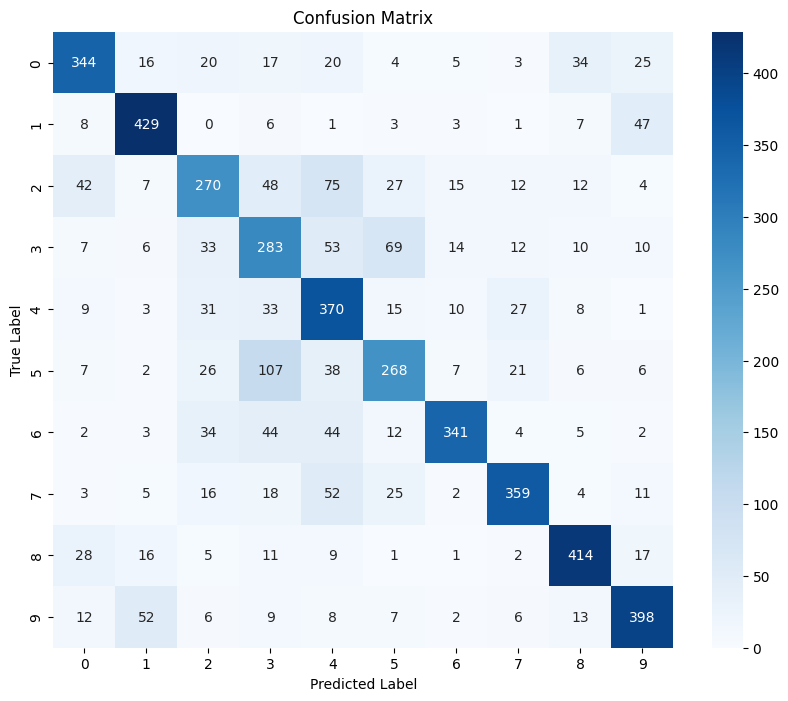

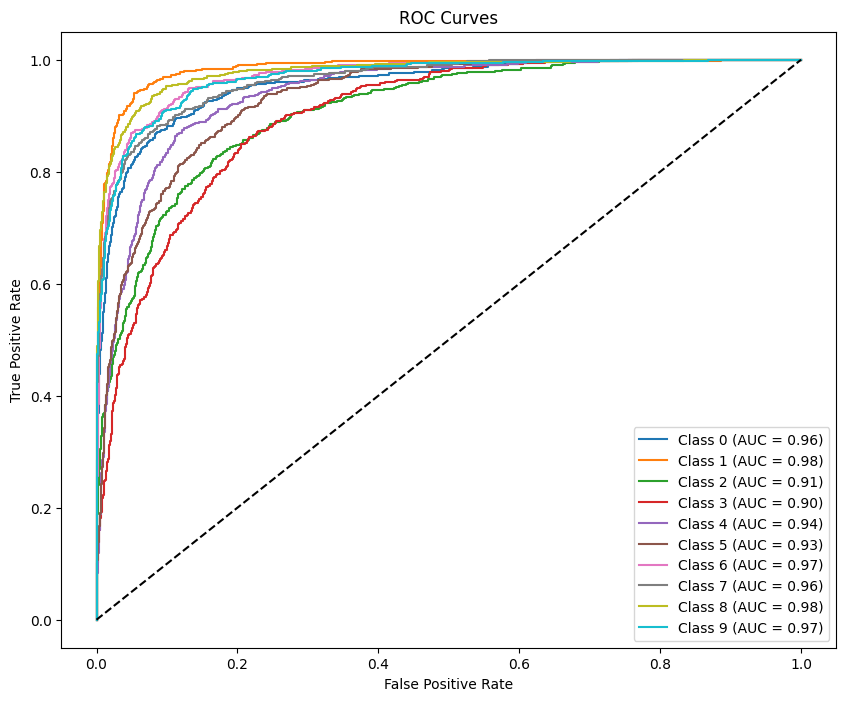

Mean AUC: 0.9502


In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


train_size = len(X_train) // 2
X_train = X_train[:train_size]
y_train = y_train[:train_size]


test_size = len(X_test) // 2
X_test = X_test[:test_size]
y_test = y_test[:test_size]

print(f"Reduced training set size: {len(X_train)}")
print(f"Reduced test set size: {len(X_test)}")


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=64,
                   validation_split=0.2)

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.tight_layout()
# plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print("\nModel Evaluation Metrics:")
print("Precision:", precision)
print(f"Recall:", recall)
print(f"F1-Score:", f1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10): 
    fpr[i], tpr[i], _ = roc_curve(y_test_classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC: {mean_auc:.4f}")

In [18]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# Function to perform block-wise DCT
def blockwise_dct (image, block_size=8):

    h, w = image.shape
    dct_image = np.zeros_like(image, dtype=np.float32)
    # Process the image in block sizes
    for i in range(0, h, block_size): 
        for j in range(0, w, block_size):
            block = image[i:i + block_size, j:j + block_size]
    # Apply DCT to the block
    dct_block = cv2.dct (np.float32 (block))
    dct_image[i:i + block_size, j:j + block_size] = dct_block
    return dct_image

def blockwise_idct(dct_image, block_size=8):

    h, w = dct_image. shape
    image_reconstructed = np.zeros_like(dct_image, dtype=np.float32)
    # Process the DCT image in block sizes
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            dct_block = dct_image[i:i + block_size, j:j + block_size]
    # Apply Inverse DCT to the block
            block = cv2.idct(dct_block)
            image_reconstructed[i:i + block_size, j:j + block_size] = block
    return image_reconstructed

In [ ]:
def blockwise_quantize_dct(dct_image, quant_matrix, block_size=8):

    h, w = dct_image. shape
    quantized_dct = np.zeros_like(dct_image)
    for i in range(0, h, block_size): 
        for j in range(0, w, block_size):
            block = dct_image[i:i + block_size, j:j + block_size]
            quantized_block = np. round (block / quant_matrix)

            # Quantization
            quantized_dct[i:i + block_size, j:j + block_size] = quantized_block
    return quantized_dct
# Function to dequantize the DCT coefficients (block-wise)
def blockwise_dequantize_dct(quantized_dct, quant_matrix, block_size=8):

    h, w = quantized_dct.shape
    dequantized_dct = np.zeros_like(quantized_dct)
    for i in range(0, h, block_size): 
        for j in range(0, w, block_size):
            block = quantized_dct[i:i + block_size, j:j + block_size]
            dequantized_block = block * quant_matrix # Dequantization
            dequantized_dct[i:i + block_size, j:j + block_size] = dequantized_block
    return dequantized_dct

In [19]:
image_path = "LenaImage.jpeg"
image = cv2. imread (image_path, cv2. IMREAD_GRAYSCALE)
# Pad the image to make its dimensions a multiple of 8
h, w = image.shape
new_h = (h + 7) //8 * 8
new_w = (w + 7) // 8 * 8
padded_image = cv2. copyMakeBorder(image, 0, new_h - h, 0, new_w - w, cv2.BORDER_CONSTANT, value=0)
# Define an 8x8 quantization matrix (for simplicity, a JPEG-like matrix)
quant_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
[12, 12, 14, 19, 26, 58, 60, 55],
[14, 13, 16, 24, 40, 57, 69, 56],
[14, 17, 22, 29, 51, 87, 80, 62],
[18, 22, 37, 56, 68, 109, 103, 77],
[24, 35, 55, 64, 81, 104, 113, 92],
[49, 64,78, 87, 103, 121, 120, 101],
[72, 92, 95, 98, 112, 100, 103, 99]])

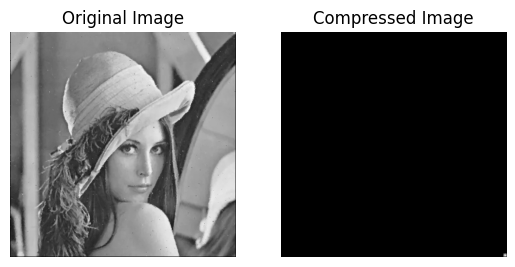

In [20]:
dct_image = blockwise_dct(padded_image)
# Quantize the DCT coefficients block-wise
quantized_dct = blockwise_quantize_dct(dct_image, quant_matrix)
# Dequantize to get the approximate DCT coefficients
dequantized_dct = blockwise_dequantize_dct(quantized_dct, quant_matrix)
# Reconstruct the image using block-wise IDCT
image_reconstructed = blockwise_idct(dequantized_dct)
# Crop the reconstructed image back to the original size
image_reconstructed = image_reconstructed[:h, :w]
# Clip the values to be in the 8-bit range and convert to uint8
image_reconstructed = np.clip(image_reconstructed, 0, 255).astype(np.uint8)
# Display the original and the compressed image

plt. subplot (1, 2, 1)
plt. imshow(image, cmap='gray')
plt.title( 'Original Image')
plt.axis('off')
plt.subplot (1, 2, 2)
plt. imshow (image_reconstructed, cmap='gray')
plt. title( 'Compressed Image')
plt.axis('off')
plt.show ()